# Import the necessary Libraries

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Load and prepare the data

In [52]:
# Load dataset
df = pd.read_csv('Dataset/dataset.csv')

# Drop irrelevant columns
df.drop(columns=['index'], inplace=True, errors='ignore')

# Correct label mapping for Binary Classification
y = df['Result'].replace({-1: 0, 1: 1})

# Verify class distribution
print("After mapping, unique values in y:", np.unique(y))  # Expected: [0, 1]


After mapping, unique values in y: [0 1]


In [53]:
# Handle missing values
X = df.drop(columns=['Result'])
X.fillna(X.median(), inplace=True)


In [54]:
# Stratified Train-Test Split to ensure both classes are represented
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify unique values in train/test sets
print("Unique values in y_train:", np.unique(y_train))  # Expected: [0, 1]
print("Unique values in y_test:", np.unique(y_test))  # Expected: [0, 1]


Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


# Define and Train the XGBoost model

In [55]:
# Define XGBoost model for Binary Classification
model = XGBClassifier(
    objective="binary:logistic",  # Binary classification
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
    use_label_encoder=False
)


In [56]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [57]:
# Grid Search
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

c:\Users\Cathal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [58]:
# Get Best Parameters
best_params = grid_search.best_params_
print("Best Parameters Found:", best_params)



Best Parameters Found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [59]:
# Train best model
best_model = XGBClassifier(
    **best_params,
    objective="binary:logistic",  
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
    use_label_encoder=False
)
best_model.fit(X_train, y_train)




c:\Users\Cathal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

# Evaluate the model

In [60]:
# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=["Class -1", "Class 1"]))



Final Test Accuracy: 0.9697
              precision    recall  f1-score   support

    Class -1       0.97      0.96      0.97       980
     Class 1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



# Save the model

In [61]:
# # Save Model
# import joblib
# joblib.dump(best_model, 'Trained_Models/Final_XGBoost_model.pkl')
# print("XGBoost Model Trained and Saved Successfully!")

# Analyise feature importance

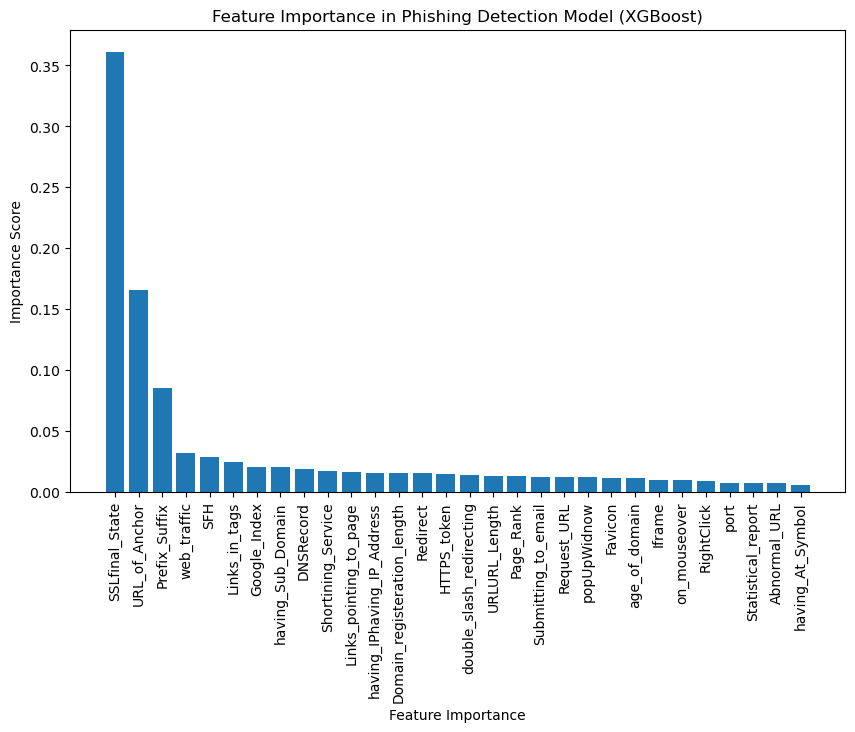

In [62]:
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importance = best_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Phishing Detection Model (XGBoost)")
plt.show()